In [66]:
import tensorflow as tf
from tensorflow import keras


In [67]:
fashon_mnist = keras.datasets.fashion_mnist

In [68]:
(X_train_full, y_train_full), (X_test, y_test) = fashon_mnist.load_data()

In [69]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [70]:
y_train_full.shape

(60000,)

In [71]:
## Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features

## we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)


X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [72]:
class_names[y_train[1234]]

'Shirt'

In [73]:
# Now let’s build the neural network! Here is a classification MLP with two hidden layers:

# MLP --> Multi layer Percepton

model = keras.models.Sequential() # keras Sequential API
model.add(keras.layers.Flatten(input_shape=[28, 28])) # input layer,  It is a Flatten layer whose role is to convert each input image into a 1D array:
# model.add(keras.layers.InputLayer(input_shape=[28,28]))  can also use it for input layer

model.add(keras.layers.Dense(300, activation="relu")) # hidden layer 300 neuron 
model.add(keras.layers.Dense(100, activation="relu")) # hidden layer  100 neuron
model.add(keras.layers.Dense(10, activation="softmax")) # output layer, after softmax applied to it


/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) # better way of doing it

In [75]:
model.name = "Keshav Sharma"

In [76]:
model.summary()

Model: "Keshav Sharma"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_11, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>]

In [78]:
hidden1 = model.layers[1]
hidden1.name

'dense_11'

In [79]:
weights, biases = hidden1.get_weights()

In [80]:
weights.shape

(784, 300)

In [81]:
# (kernel is another name for the matrix of connection
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead.

# If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.




In [82]:
# training the model

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


ValueError: 'Keshav Sharma' is not a valid root scope name. A root scope name has to match the following pattern: ^[A-Za-z0-9.][A-Za-z0-9_.\\/>-]*$

Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
history.history

{'accuracy': [0.7612545490264893,
  0.8295817971229553,
  0.8435817956924438,
  0.8547818064689636,
  0.859854519367218,
  0.8658545613288879,
  0.8702727556228638,
  0.8723636269569397,
  0.876945436000824,
  0.8802363872528076,
  0.8837817907333374,
  0.8855090737342834,
  0.8885999917984009,
  0.8903999924659729,
  0.8934545516967773,
  0.8953272700309753,
  0.8961636424064636,
  0.8991090655326843,
  0.9004908800125122,
  0.9028545618057251,
  0.9042181968688965,
  0.9057818055152893,
  0.9070363640785217,
  0.9102363586425781,
  0.9107818007469177,
  0.9109636545181274,
  0.91356360912323,
  0.916345477104187,
  0.9174000024795532,
  0.9171817898750305],
 'loss': [0.7181106805801392,
  0.4887324273586273,
  0.44380155205726624,
  0.4158899188041687,
  0.3959178030490875,
  0.3790874779224396,
  0.3661527931690216,
  0.35416123270988464,
  0.3442692160606384,
  0.33388322591781616,
  0.32575860619544983,
  0.3180176913738251,
  0.3105897307395935,
  0.30396968126296997,
  0.2967341

(0.0, 1.0)

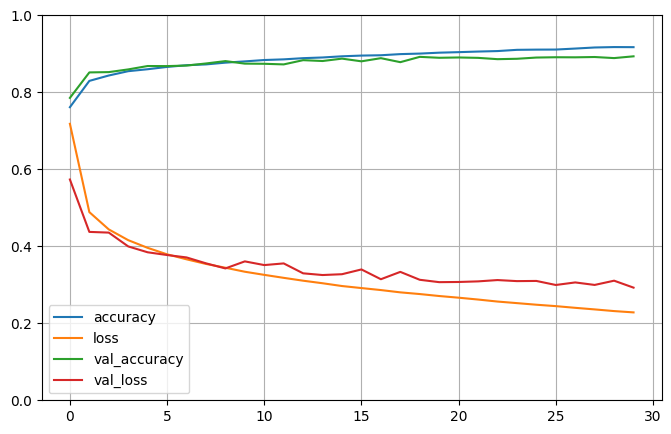

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))

plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()


In [ ]:
history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)) # continues from where it left off

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9169 - loss: 0.2294 - val_accuracy: 0.8932 - val_loss: 0.2979
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9213 - loss: 0.2179 - val_accuracy: 0.8902 - val_loss: 0.3020
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9207 - loss: 0.2182 - val_accuracy: 0.8972 - val_loss: 0.2873
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9228 - loss: 0.2135 - val_accuracy: 0.8936 - val_loss: 0.2920
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2092 - val_accuracy: 0.8936 - val_loss: 0.2922
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9271 - loss: 0.2050 - val_accuracy: 0.8930 - val_loss: 0.2994
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9263 - loss: 0.2055 - val_accuracy: 0.8962 - val_loss: 0.3015
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9289 - loss: 0.2021 - 

In [ ]:
## evaludating the model on test set

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8587 - loss: 67.1447


[69.48444366455078, 0.8567000031471252]

Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

In [ ]:
# predicting
X_new = X_train[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.  , 0.  , 0.09, 0.  , 0.49, 0.  , 0.41, 0.  , 0.  , 0.  ],
       [0.9 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.04]],
      dtype=float32)

In [98]:
# Building a Regression MLP Using the Sequential API

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [99]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
         X_train_full, y_train_full)

In [100]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

The main differences are the fact that the output layer has a single neuron (since we only want to predict a sin‐ gle value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting

In [130]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:] ), # skipping rows) # 30 neurons,
    keras.layers.Dense(1) # output layer, only one neuron, no activation function (regression model)

])

model.compile(loss="mean_squared_error", optimizer="sgd") # ok
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

# making predictions
X_new = X_test[:3] # pretend these are new instances y_pred = model.predict(X_new)
y_pred = model.predict(X_new)

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 45s 126ms/step - loss: 6.3825

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.3952 - val_loss: 0.9857
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.7117 - val_loss: 0.5198
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.5229 - val_loss: 0.4807
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.5015 - val_loss: 0.4652
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.4766 - val_loss: 0.4497
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.4551 - val_loss: 0.4468
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.4630 - val_loss: 0.4267
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.4360 - val_loss: 0.4199
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.4287 - val_loss: 0.4127
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.4342 - val_loss: 0.4109
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.4386 - val_loss: 0.4031
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
y_pred

array([[1.2105587],
       [1.370321 ],
       [1.8295108]], dtype=float32)

## Functional API (Wide and DEEP Non Sequential Model)

In [104]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)


In [105]:
func_model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
func_model.compile(loss="mean_squared_error", optimizer="sgd", metrics=[""]) # ok
history = func_model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = func_model.evaluate(X_test, y_test)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 2.2915 - val_loss: 0.5276
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.5781 - val_loss: 0.4967
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.5336 - val_loss: 0.4616
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.5411 - val_loss: 0.4555
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.4816 - val_loss: 0.4474
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.4505 - val_loss: 0.9311
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.5581 - val_loss: 0.4296
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.4377 - val_loss: 0.4190
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.4474 - val_loss: 0.4116
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.5326 - val_loss: 0.4104
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4129 - val_loss: 0.3882
Epoch 12/20
363/363 ━━━━━━━━━━

For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7)

In [126]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hid1 = keras.layers.Dense(30, activation="relu")(input_B)
hid2 = keras.layers.Dense(30, activation="relu")(hid1)
concat_layer = keras.layers.concatenate([input_A, hid2])
output_layer = keras.layers.Dense(1, name="output_layer")(concat_layer)

model_ = keras.models.Model(inputs=[input_A, input_B], outputs=[output_layer])

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input.

In [127]:
model_.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) ## lr = 0.05

In [128]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [131]:
history = model_.fit((X_train_A, X_train_B), y_train, epochs=100, validation_data=((X_valid_A, X_valid_B), y_valid))


Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.5244 - val_loss: 0.4868
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 0.4903 - val_loss: 0.4839
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.5034 - val_loss: 0.4805
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.4839 - val_loss: 0.4815
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.5194 - val_loss: 0.4765
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.4978 - val_loss: 0.4745
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.4771 - val_loss: 0.4731
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.5160 - val_loss: 0.4705
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.5021 - val_loss: 0.4687
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.4878 - val_loss: 0.4680
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.4991 - val_loss: 0.4654
Epoch 12/100
363/36

In [119]:
# you can also add extra outputs if you want 

In [ ]:
# [...] # Same as above, up to the main output layer
# output = keras.layers.Dense(1, name="main_output")(concat)
# aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
# model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# # We care much more about the main output than about the auxiliary output (as it is just used for regulari‐ zation),
# # so we want to give the main output’s loss a much greater weight

# model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


# history = model.fit(
#          [X_train_A, X_train_B], [y_train, y_train], epochs=20,
#          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

#  total_loss, main_loss, aux_loss = model.evaluate(
#         [X_test_A, X_test_B], [y_test, y_test])


# y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Using the Subclassing API to Build Dynamic Models


Both the Sequential API and the Functional API are declarative: you start by declar‐ ing which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more impera‐ tive programming style, the Subclassing API is for you.

In [132]:
class WideAndDeepModel(keras.Model): # subclassing keras.Model
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


In [133]:
model = WideAndDeepModel()

this is for extra flexibility and you can define inputs later on this pre defined architecture

In [134]:
## you can save your model by calling

model_.save("best_model.h5") #HDF5 

In [ ]:
# loading the saved model
loaded_model = keras.models.load_model("best_model.h5")

## very important information

But what if training lasts several hours? This is quite common, especially when train‐ ing on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the fit() method to save checkpoints? Use callbacks.

In [141]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:] ), # skipping rows) # 30 neurons,
    keras.layers.Dense(1) # output layer, only one neuron, no activation function (regression model)

])

model.compile(loss="mean_squared_error", optimizer="sgd") 

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras") # save it with this name 
# ModelCheckpoint saves your model at end each of epoch
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1.2919
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 4.4291
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.4992
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.4737
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.4411
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.4270
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.4263
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.4129
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.4074
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.4153


Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. The following code is a simple way to implement early stopping

In [143]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_best_model.keras", save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, callbacks=[checkpoint_cb])



Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4142 - val_loss: 0.3747
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4003 - val_loss: 0.3738
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.4047 - val_loss: 0.3735
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.3887 - val_loss: 0.3651
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.4108 - val_loss: 0.3647
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.3781 - val_loss: 0.3684
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.3884 - val_loss: 0.3582
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.3920 - val_loss: 0.3612
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3705 - val_loss: 0.3542
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.3747 - val_loss: 0.3527
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.3710 - val_loss: 0.3564
Epoch 12/20
363/363 ━━━━━━━━━━━━━━

In [144]:
my_best_model = keras.models.load_model("my_best_model.keras") # loads the model with lowest Validation Loss Score 

In [150]:
l = my_best_model.evaluate(X_test, y_test) # good model

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.3502


Another way to implement early stopping is to simply use the EarlyStopping call‐ back. It will interrupt training when it measures no progress on the validation set for 
a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources)

In [151]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3599 - val_loss: 0.3375
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.3515 - val_loss: 0.3353
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.3493 - val_loss: 0.3378
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.3611 - val_loss: 0.3404
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.3448 - val_loss: 0.3423
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.3531 - val_loss: 0.3365
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.3582 - val_loss: 0.3425
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.3367 - val_loss: 0.3293
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.3619 - val_loss: 0.3314
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.3340 - val_loss: 0.3290
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.3423 - val_loss: 0.3279
Epoch 12/100
363/363 

In [153]:
# no need to load the model again, the early stopping will automatically restore the best weights to the model
model.evaluate(X_test, y_test) ### bestest model

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.3276


0.29941442608833313

In [ ]:
## writing custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    # you can implement on_train_begin(), on_train_end(),
    #  on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end()
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [154]:
# using Tensorboard something
import os
root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [155]:
# Keras provides a nice TensorBoard() callback:

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])



Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3233 - val_loss: 0.3045
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3314 - val_loss: 0.3083
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3284 - val_loss: 0.3069
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3106 - val_loss: 0.3020
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3090 - val_loss: 0.3016
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.3100 - val_loss: 0.3118
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.3131 - val_loss: 0.3123
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.3082 - val_loss: 0.3186
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.3287 - val_loss: 0.3033
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.3171 - val_loss: 0.3019
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.3287 - val_loss: 0.3081
Epoch 12/100
363/363 ━━━━━━━━

Fine-Tuning Neural Network Hyperparameters


using GridSearchCV

or

RandomisedSearchCV

In [156]:
def build_model(n_hidden=1, n_neurons=30, lr=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))

    model.add(keras.layers.Dense(1)) # Output layer
    optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])
    return model

In [183]:
# KerasRegressor based on this build_model()
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(model=build_model, epochs=100,
    # validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)],
    verbose=0)


we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method

In [184]:
keras_reg.fit(X_train, y_train)

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasRegressor(
	model=<function build_model at 0x16d6770a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x10b9fbaf0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
)

In [176]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

import numpy as np

params_distribs = {
    "n_hidden": [0, 1 ,2, 3], 
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, params_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [3]:
import scikeras
import sklearn
import tensorflow as tf

print(scikeras.__version__)
print(sklearn.__version__)
print(tf.__version__)

0.13.0
1.5.2
2.19.0


## FUCK SCIKERAS.. ALL MY HOMIES LOVE "KERAS TUNER"

### 1. how to select appropriate optimizer
### 2. No of neurons in a layer
### 3. how to select no of layers
### 4. we wil make all in all one model with best accuracy

In [17]:
import kerastuner as kt


/var/folders/mx/gt4xb15x3vs8gsgpg6gcg1j00000gn/T/ipykernel_45769/1337601089.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [4]:
## loading classification dataset (Diabeters) (as accuracy is a parameter of classification, not regression)
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [5]:
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [11]:
import keras

In [8]:
X = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_dim=8, activation="relu"))
model.add(keras.layers.Dense(1, name="output_layer", activation="sigmoid"))



/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5964 - loss: 0.7758 - val_accuracy: 0.5974 - val_loss: 0.7253
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.6834 - val_accuracy: 0.6364 - val_loss: 0.6693
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.6452 - val_accuracy: 0.6558 - val_loss: 0.6242
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6551 - loss: 0.6223 - val_accuracy: 0.6883 - val_loss: 0.5908
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5619 - val_accuracy: 0.7208 - val_loss: 0.5645
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5890 - val_accuracy: 0.7597 - val_loss: 0.5464
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7246 - loss: 0.5439 - val_accuracy: 0.7532 - val_loss: 0.5317
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.5361 - val_accuracy: 0.7792 - v

In [22]:
def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, activation="relu", input_dim=8))
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    optimizer = hp.Choice("optimizer", values=["adam", "sgd", "rmsprop", "adadelta"])

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model




In [23]:
tuner = kt.RandomSearch(hypermodel=build_model, objective="val_accuracy", max_trials=5)


/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 4 Complete [00h 00m 01s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 05s


In [25]:
best_hyperparameters = tuner.get_best_hyperparameters()

In [27]:
best_hyperparameters[0].values

{'optimizer': 'sgd'}

In [28]:
model_ = tuner.get_best_models(num_models=1)[0] # to get top model

/Users/keshavsharma/Downloads/DATA SCIENCE LESSGO/chai_aur_code_numpy/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model_.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=1000)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7220 - loss: 0.5629 - val_accuracy: 0.7792 - val_loss: 0.5324
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.5470 - val_accuracy: 0.7792 - val_loss: 0.5249
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7405 - loss: 0.5607 - val_accuracy: 0.7792 - val_loss: 0.5184
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5402 - val_accuracy: 0.7727 - val_loss: 0.5127
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7763 - loss: 0.5180 - val_accuracy: 0.7727 - val_loss: 0.5073
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7686 - loss: 0.5153 - val_accuracy: 0.7857 - val_loss: 0.5028
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.5307 - val_accuracy: 0.7857 - val_loss: 0.4996
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7529 - loss: 0.5169 - val_accuracy: 0.

OKAYYY.. so best optimizer is SGD

now, lets find number of neurons using keras tuner

In [35]:
import numpy as np

In [38]:
def build_model(hp):
    model = keras.models.Sequential()
    units = hp.Int('units', min_value= 8, max_value = 128, step=8)
    lr = hp.Choice("learning_rate", values=[1e-1, 2e-2, 3e-3, 4e-4])
    model.add(keras.layers.Dense(units, activation="relu", input_dim=8))
    model.add(keras.layers.Dense(1, activation="sigmoid"))


    optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model




In [42]:
tuner = kt.RandomSearch(hypermodel=build_model, objective="val_accuracy", max_trials=100)

Reloading Tuner from ./untitled_project/tuner0.json


In [43]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Trial 60 Complete [00h 00m 01s]
val_accuracy: 0.27272728085517883

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 01m 36s


In [45]:
tuner.get_best_hyperparameters(num_trials=1)[0].values

{'units': 48, 'learning_rate': 0.1}

In [46]:
## best parameters
best_params= {'units': 48, 'learning_rate': 0.1, "optimizer": "sgd"}

# now lets find the best number of layers

In [51]:
def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(best_params["units"], activation="relu", input_dim=8))
    units = hp.Int('units', min_value= 8, max_value = 128, step=8)

    for i in range(hp.Int("num_layers", min_value=1, max_value=10)):
        model.add(keras.layers.Dense(units, activation="relu"))

    model.add(keras.layers.Dense(1, activation="sigmoid"))
    
    optimizer = keras.optimizers.SGD(learning_rate=best_params["learning_rate"])
    model.compile(optimizer=optimizer, loss="binary_crossentropy",  metrics=["accuracy"])

    return model
                   

In [52]:
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective="val_accuracy",
                        max_trials=1000,
                        directory="newdir",
                        project_name="David Harvey")

In [53]:
tuner.search(X_train,y_train, validation_data=(X_test,y_test), epochs=20)

Trial 133 Complete [00h 00m 02s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8636363744735718
Total elapsed time: 00h 04m 34s


In [55]:
a = tuner.get_best_hyperparameters(num_trials=1)[0].values

In [58]:
best_params.update(a)

In [59]:
best_params

{'units': 88, 'learning_rate': 0.1, 'optimizer': 'sgd', 'num_layers': 6}